# Glove vs DAN

We want to illustrate the the Feedforward Layers of an DAN learn a more abstract representation then simple bow-averaging, so that each layer will increasingly magnify small but meaningful differences in the word embedding average.

Notes:
___

1. For PCA are to similar sentences shit.. 
2. T-SNE -> Results are shit. How does this algorithm work??
3. PFFFF

4. Maybe it looks much better in a 3D Plot


Try this whole shit with.. Trained USE

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
import tensorflow_hub as tf_hub
import seaborn as sns
from typing import *

In [2]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

In [3]:
# Implementing TFhub env
os.environ["TFHUB_CACHE_DIR"] = '/tfhub'
model_url = "https://tfhub.dev/google/universal-sentence-encoder/2"

model_use = tf_hub.Module(model_url, trainable=False)

INFO:tensorflow:Using /tfhub to cache modules.


In [4]:
# https://nlp.stanford.edu/projects/glove
glove_vecs = "/Users/Daniel/Downloads/glove.6B/glove.6B.300d.txt"
word2vec_out = "/Users/Daniel/Downloads/glove.6B/w2v.6B.300d.txt" # Place for transformed GloveFiles

In [127]:
s1 = "i want to predict costs"
s2 = "i want to predict the stock price"
s3 = "i want to find sequence pattern"
s4 = "i want similar costs"

sentences = [s1,s2,s3, s4]

## Transforming Glove Vectors to Word2Vec Format

In [85]:
%%time
# glove2word2vec(glove_input_file=glove_vecs, word2vec_output_file=word2vec_out)
glove_model = KeyedVectors.load_word2vec_format(word2vec_out, binary=False)

CPU times: user 2min 20s, sys: 4.44 s, total: 2min 24s
Wall time: 2min 41s


## Sentences to Vectors

In [128]:
%%time
_dict = {}
with tf.Session() as session: 
    # Initializing global variables in the graph 
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    
    sentence_embeddings = session.run(model_use(sentences))
    for index, se in enumerate(sentence_embeddings):
        _dict.update({sentences[index]: se})

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
CPU times: user 28.4 s, sys: 6.51 s, total: 34.9 s
Wall time: 36.7 s


In [129]:
_dict.keys()

dict_keys(['i want to predict costs', 'i want to predict the stock price', 'i want to find sequence pattern', 'i want similar costs'])

### GLOVE

#### Creating word set

In [130]:
### getting every word
from nltk.tokenize import word_tokenize
word_set = set()

for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words: 
        word_set.add(word)

#### Getting word vectors

In [131]:
_dict_words = {}

for word in word_set: 
    _dict_words.update({word: glove_model[word]})

In [132]:
_dict_words.keys()

dict_keys(['find', 'pattern', 'sequence', 'similar', 'the', 'i', 'costs', 'stock', 'want', 'predict', 'to', 'price'])

#### Averaging words

In [133]:
def calculate_average(bag_of_words: List[np.ndarray]):
    _vector_sum = np.zeros((300,))
    for x in bag_of_words:
        _vector_sum += x
       
    return (_vector_sum/len(bag_of_words))

In [134]:
_dict_averages = {}
for sentence in sentences:
    bag_of_words = []
    for word in _dict_words.keys():
        if word in sentence: 
            bag_of_words.append(_dict_words[word])
    average = calculate_average(bag_of_words)
    _dict_averages.update({sentence: average})

In [135]:
_dict_averages.keys()

dict_keys(['i want to predict costs', 'i want to predict the stock price', 'i want to find sequence pattern', 'i want similar costs'])

In [136]:
_dict_averages

{'i want to predict costs': array([-1.13249401e-01,  2.15819603e-01, -9.94904531e-02,  1.63009986e-02,
        -6.91045985e-02, -3.33917998e-02,  1.17531181e-01,  5.46817988e-02,
        -8.06879848e-03, -1.78611999e+00,  4.11200002e-02, -4.79185946e-02,
         1.45885202e-01,  8.46996180e-02,  1.80868194e-01, -8.51241806e-02,
        -6.54520392e-03,  2.43697818e-02, -3.80779952e-03, -1.94479972e-02,
         1.31209995e-01,  1.02610001e-01,  2.62843210e-01,  4.80924003e-02,
        -2.58344004e-01, -8.09490010e-02,  2.22815168e-01, -3.63840014e-02,
         7.78295971e-02, -2.17379802e-01,  2.07239795e-01,  1.60880002e-01,
        -1.62478596e-01, -1.60432201e-01, -1.04173999e+00,  1.15089202e-01,
        -2.34213802e-01,  4.67843972e-02, -8.43687604e-02, -1.36316393e-01,
        -1.02451602e-01, -3.36704594e-01, -2.19080001e-02,  7.76799917e-03,
        -4.51025963e-02, -1.78495198e-01,  1.14817599e-01,  1.30349606e-01,
         2.95314164e-02, -4.85460162e-03,  2.52612196e-01, -3

### Dimensionality Reduction

In [137]:
from sklearn.decomposition import PCA

In [138]:
pca_USE = PCA(n_components=2)
pca_glove = PCA(n_components=2)

In [139]:
vectors_use = []

for sentence in sentences: 
    vectors_use.append(_dict[sentence])
    
vectors_glove = []
for sentence in sentences: 
    vectors_glove.append(_dict_averages[sentence])

In [140]:
matrix_use = pca_USE.fit_transform(vectors_use)
matrix_glove = pca_glove.fit_transform(vectors_glove)

In [141]:
df_use = pd.DataFrame(data = {"sentence": sentences,      
                    "x": matrix_use[:,0],
                    "y": matrix_use[:,1]
                    })

df_glove = pd.DataFrame(data = {"sentence": sentences,      
                    "x": matrix_glove[:,0],
                    "y": matrix_glove[:,1]
                    })

In [142]:
df_use

,sentence,x,y
0,i want to predict costs,-0.305399,-0.102889
1,i want to predict the stock price,-0.190863,-0.580479
2,i want to find sequence pattern,0.809887,0.064180
3,i want similar costs,-0.313625,0.619189


In [143]:
df_glove

,sentence,x,y
0,i want to predict costs,-0.651092,-0.066004
1,i want to predict the stock price,-0.563146,1.229694
2,i want to find sequence pattern,1.715635,0.029793
3,i want similar costs,-0.501397,-1.193483


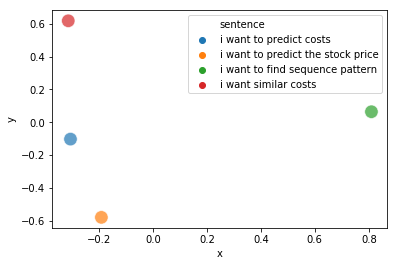

In [144]:
ax = sns.scatterplot(x="x", y="y", hue="sentence", s = 180, alpha = 0.7, legend = "full", data=df_use)


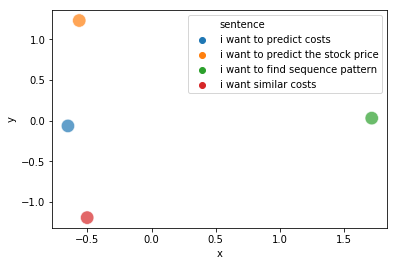

In [145]:
sns.scatterplot(x="x", y="y", hue="sentence", s = 180, alpha = 0.7, legend = "full",data=df_glove)


In [146]:
# U can can cheat better with an 3D plot